In [49]:
%load_ext autoreload
%autoreload 2

import gym, ray

import os
import fmuSimulation.gymFMU as ExampleFMU
from fmuSimulation.configReader import configReader
import numpy as np
import sys



import numpy as np
import torch
import gym
import argparse
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
config = os.path.abspath('Example.cfg')
cfg = configReader(config)
config = cfg.getAgent()
env = ExampleFMU.gymFMU(config['env_config'])

Incompatible sample time and stop time.
 Using 5.0 as stop time instead


In [37]:
env.fmu.getOutput()

[ScalarVariable(name='Measurement.Height', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Measurement.error', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Measurement.errorIntegral', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [38]:
env.fmu.getInput()

[ScalarVariable(name='Control.uctrl', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Control.ref', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [81]:
outputs = np.array([])
done = False
Kp = 9.80199999804512
Ki = 1.00019996230706e-06
obs = env.reset()
while not done:
    action = np.array([Kp * obs[0] + Ki * obs[1]])
    obs, reward, done, _ = env.step(action)
    #ouputs = np.append(outputs, [*obs, *action])
    
    outputs = np.append(outputs, [reward, *action, *obs])
outputs = outputs.reshape([-1,4])
print(np.sum(outputs[:,0]))

-940.5686012327762


In [42]:
outputs = outputs.reshape([-1,4])
outputs.shape


(200, 4)

In [83]:
env.reset()

array([10. ,  0.4])

In [40]:
import matplotlib.pyplot as plt


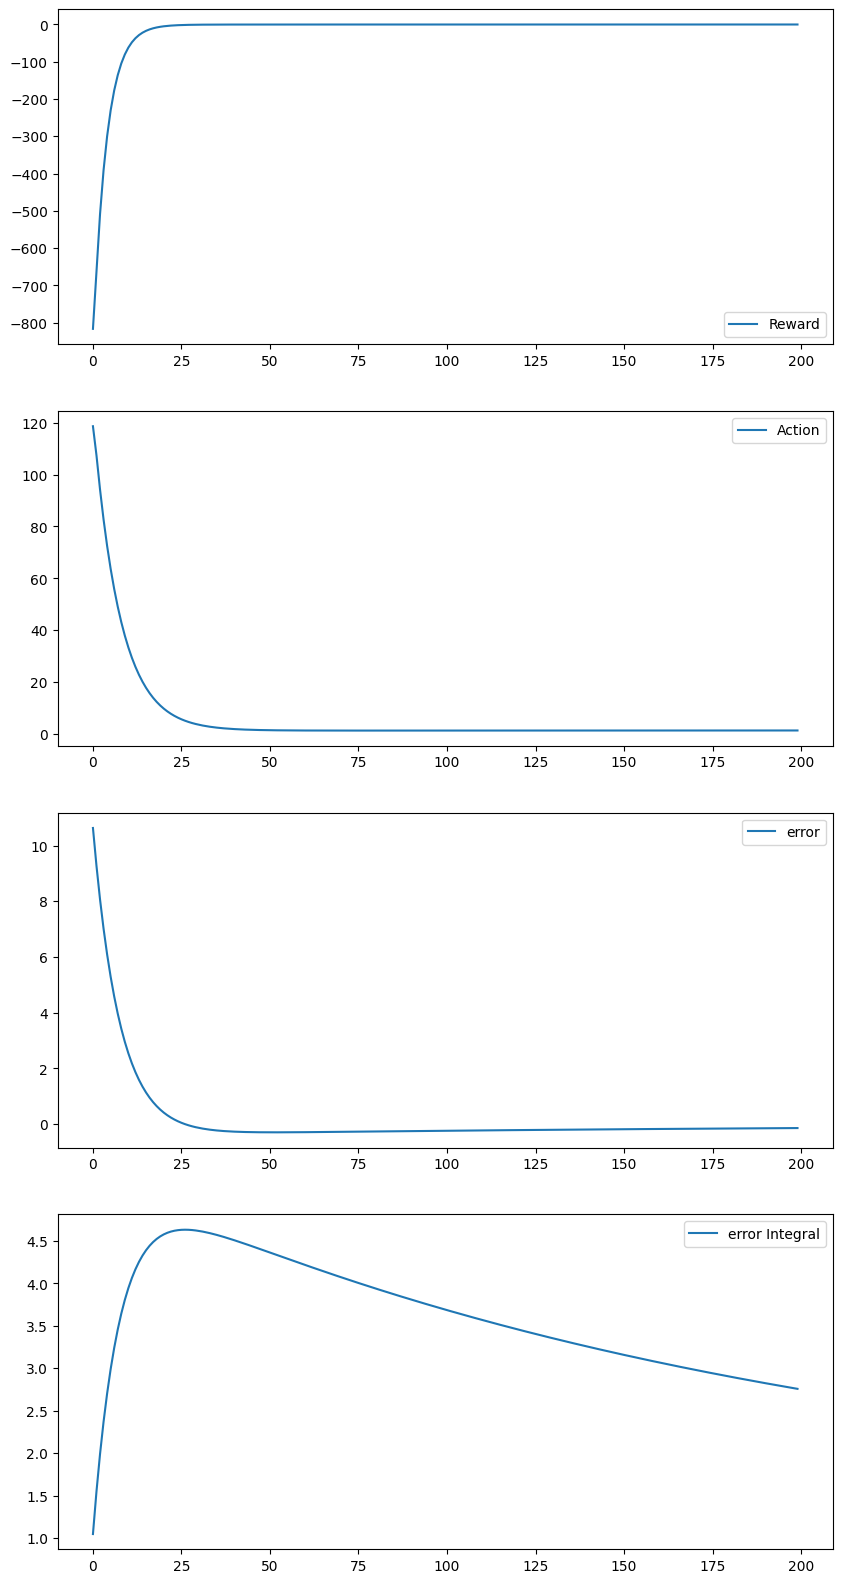

In [43]:
fig = plt.figure(figsize=[10,20])
ax = fig.subplots(4)
labels = ['Reward', 'Action', 'error', 'error Integral']
i = 0
ax[i].plot(outputs[:,i], label=labels[i])
ax[i].legend()
i = 1
ax[i].plot(outputs[:,i], label=labels[i])
ax[i].legend()
i = 2
ax[i].plot(outputs[:,i], label=labels[i])
ax[i].legend()
i = 3
ax[i].plot(outputs[:,i], label=labels[i])
ax[i].legend()

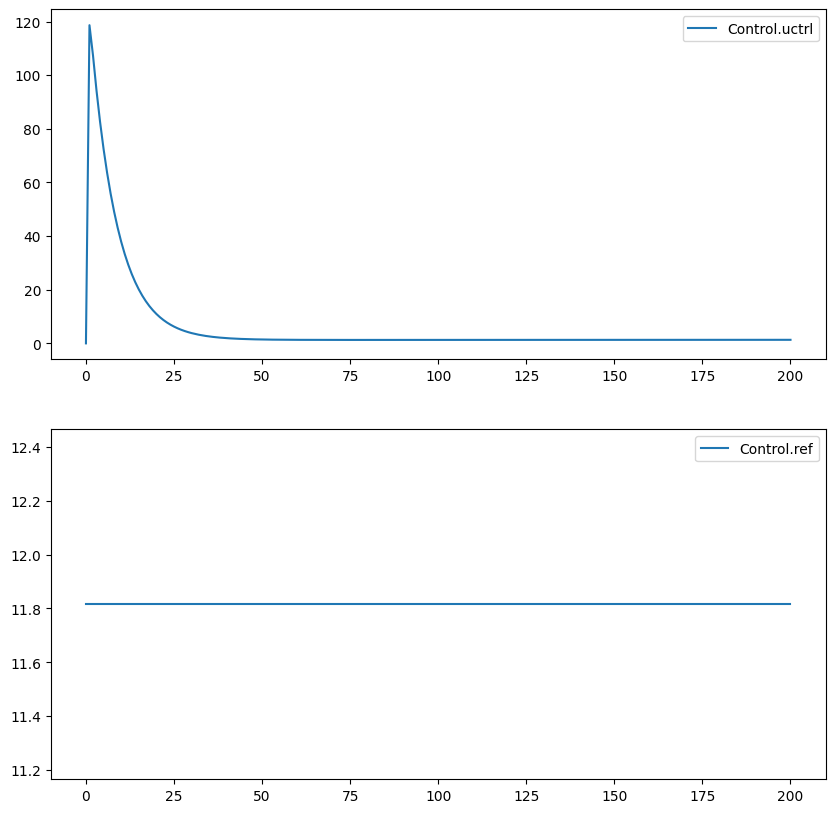

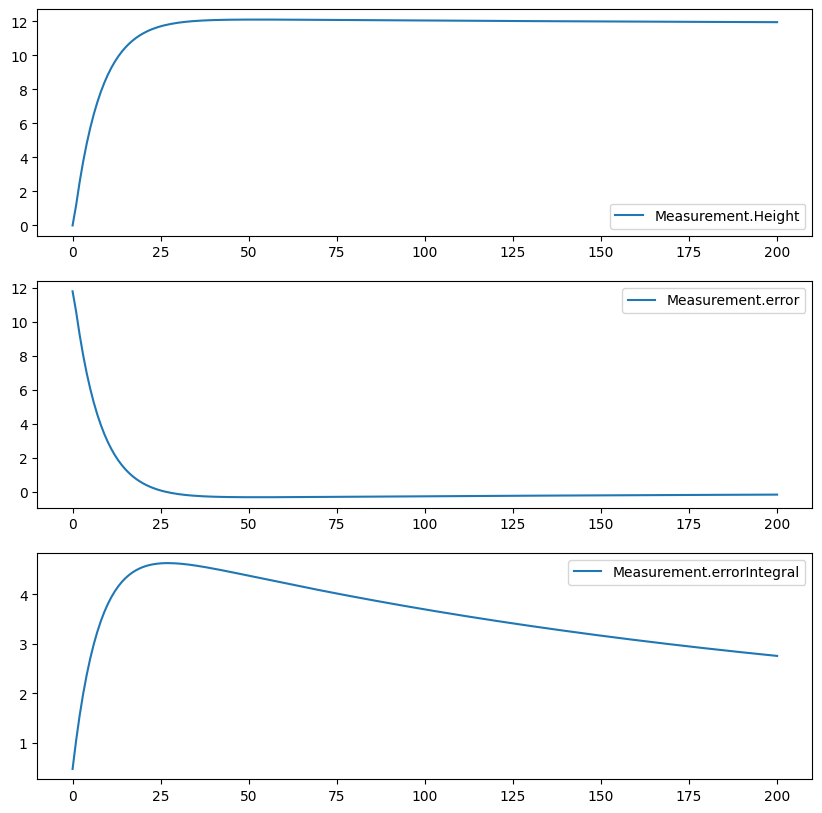

In [45]:

fig = plt.figure(figsize=[10,10])
ax = fig.subplots(len(env.fmu.getInput()))
for i, inpt in enumerate(env.fmu.getInput()):
    ax[i].plot(env.inputs[:,i], label=inpt.name)
    ax[i].legend()

fig = plt.figure(figsize=[10,10])
ax = fig.subplots(len(env.fmu.getOutput()))
for i, inpt in enumerate(env.fmu.getOutput()):
    ax[i].plot(env.outputs[:,i], label=inpt.name)
    ax[i].legend()


In [36]:
env.outputs[-1,:]

array([6.92852846e-310, 6.44561125e-316, 6.44562468e-316])